# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


# Carregue a base de dados
df = pd.read_csv('demo01_processed.csv')

# Separe as variáveis explicativas da variável resposta
X = df.drop('mau', axis=1)
y = df['mau']

# Divida a base em treinamento (70%) e validação (30%)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

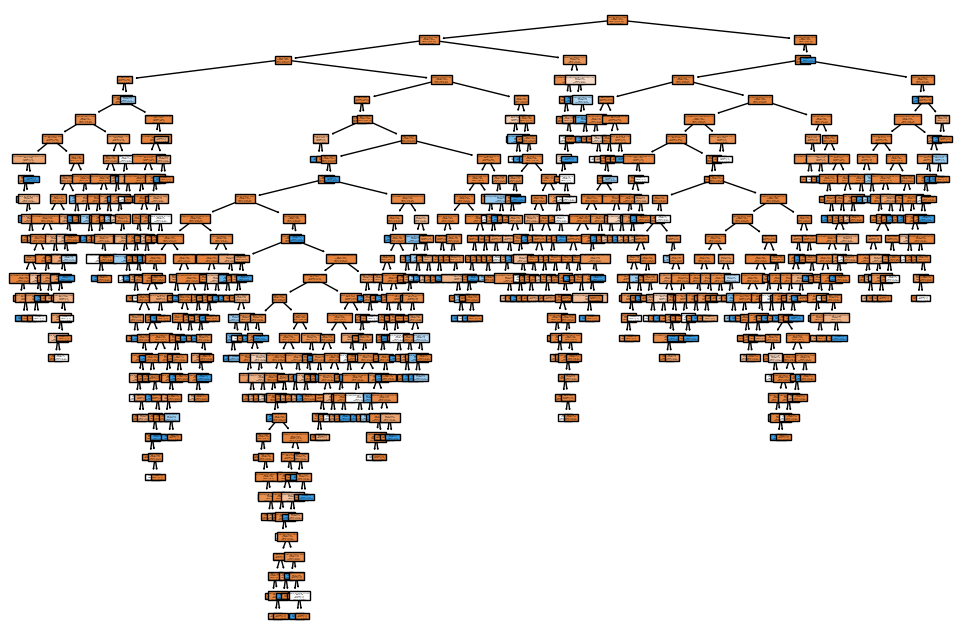

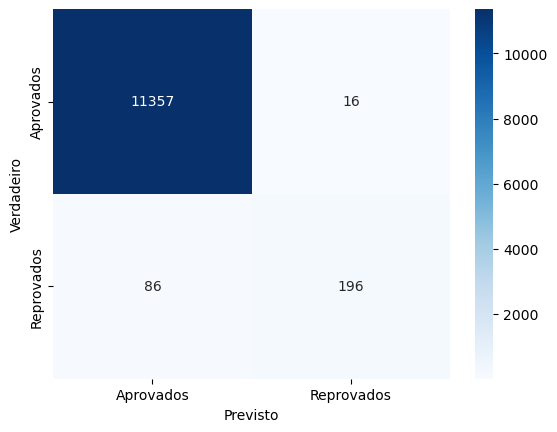

Acurácia na base de treinamento: 0.9912483912483913


In [19]:
# Defina um objeto com a função da árvore de decisão
clf = DecisionTreeClassifier(random_state=42)

# Treine o modelo
clf.fit(X_train, y_train)

# Visualize a árvore
plt.figure(figsize=(12,8))  # Aumente um pouco a figura
plot_tree(clf, filled=True, class_names=['Aprovados', 'Reprovados'], feature_names=X_train.columns)
plt.show()

# Prever os valores de treinamento
y_train_pred = clf.predict(X_train)

# Produza uma matriz de confusão
cm = confusion_matrix(y_train, y_train_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Aprovados', 'Reprovados'], yticklabels=['Aprovados', 'Reprovados'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()

# Calcule a acurácia na base de treinamento
accuracy = accuracy_score(y_train, y_train_pred)
print(f'Acurácia na base de treinamento: {accuracy}')

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

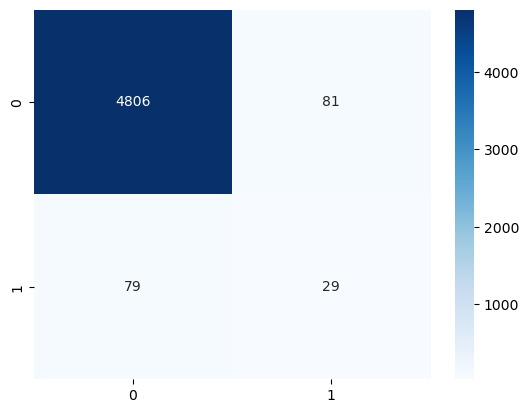

Acurácia da base de teste: 0.9679679679679679


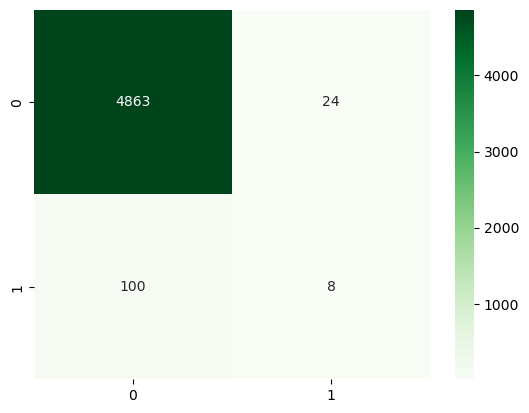

Proporção de proponentes classificados como 'maus': 0.006406406406406407
Acurácia classificando todos os contratos como 'bons': 0.9783783783783784


In [20]:
# Importar as bibliotecas necessárias
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Continuar do código anterior
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Classificar a base de teste
y_pred = dt_classifier.predict(X_valid)

# Produzir a matriz de confusão para a base de teste
conf_matrix = confusion_matrix(y_valid, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.show()

# Calcular a acurácia da base de teste
accuracy_test = accuracy_score(y_valid, y_pred)
print(f"Acurácia da base de teste: {accuracy_test}")

# Treinar uma nova árvore
dt_classifier_new = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
dt_classifier_new.fit(X_train, y_train)

# Avaliar a matriz de classificação
y_pred_new = dt_classifier_new.predict(X_valid)
conf_matrix_new = confusion_matrix(y_valid, y_pred_new)
sns.heatmap(conf_matrix_new, annot=True, fmt='d', cmap='Greens')
plt.show()

# Verificar a proporção dea proponentes classificados como 'maus'
bad_prop = y_pred_new.mean()
print(f"Proporção de proponentes classificados como 'maus': {bad_prop}")

# Calcular a acurácia se todos os contratos fossem classificados como 'bons'
all_good_accuracy = accuracy_score(y_valid, [0]*len(y_valid))
print(f"Acurácia classificando todos os contratos como 'bons': {all_good_accuracy}")